<a href="https://colab.research.google.com/github/ll-cooool-j/DS-Assignment/blob/main/arima_forecasting_ver%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


            Confirmed  Deaths  Recovered  Infected
Date                                              
2020-07-01   10675596  541738    5468425   4665433
2020-07-02   10885548  547161    5753359   4585028
2020-07-03   11086923  552455    5863247   4671221
2020-07-04   11280744  557248    6059007   4664489
2020-07-05   11464726  561077    6178370   4725279


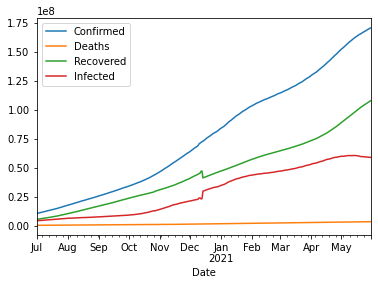

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = read_csv('/content/Global.csv', header=0, parse_dates=[0], index_col=0)
print(series.head())
series.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


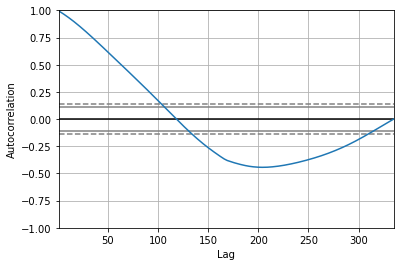

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
series = read_csv('/content/Global.csv', header=0, parse_dates=[0], index_col=0)
autocorrelation_plot(series['Infected'])
pyplot.show()

1/ This code below print the summary of the fit model

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

2/ This aslo help us get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

3/ Finally, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:             D.Infected   No. Observations:                  334
Model:                ARIMA(10, 1, 0)   Log Likelihood               -4748.159
Method:                       css-mle   S.D. of innovations         360975.706
Date:                Sat, 03 Jul 2021   AIC                           9520.318
Time:                        13:50:00   BIC                           9566.052
Sample:                    07-02-2020   HQIC                          9538.552
                         - 05-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.624e+05    4.1e+04      3.964      0.000    8.21e+04    2.43e+05
ar.L1.D.Infected      0.0624      0.055      1.141      0.255      -0.045       0.170
ar.L2.D.Infected     -0.

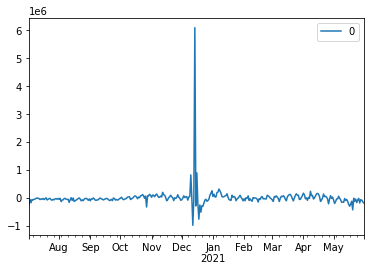

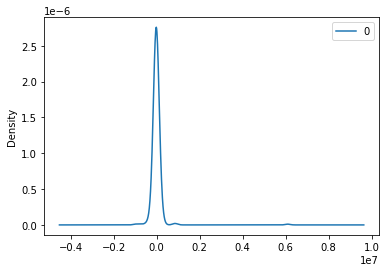

                  0
count  3.340000e+02
mean  -2.038319e+03
std    3.615433e+05
min   -9.839725e+05
25%   -6.821926e+04
50%   -2.348509e+04
75%    3.729416e+04
max    6.097137e+06


In [2]:
# fit an ARIMA model and plot residual errors
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# load datase
series = read_csv('/content/Global.csv', header=0, index_col=0)
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# fit model
model = ARIMA(series.iloc[:,3:4], order=(10,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Last but not least, we use ARIMA model to forecast the future time steps

Below is an example of a rolling forecast with the ARIMA model in Python.

It also compares the predicted value and expected value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=51723302.757641, expected=51816229.000000
predicted=51993839.714446, expected=52085584.000000
predicted=52282950.211745, expected=52219637.000000
predicted=52417872.709515, expected=52364998.000000
predicted=52574043.036452, expected=52586110.000000
predicted=52794995.104586, expected=52873692.000000
predicted=53061784.859015, expected=53228352.000000
predicted=53420837.151053, expected=53531259.000000
predicted=53720625.286315, expected=53685760.000000
predicted=53885649.231562, expected=53883147.000000
predicted=54109994.457793, expected=54016912.000000
predicted=54225859.203480, expected=54238529.000000
predicted=54444128.862789, expected=54424199.000000
predicted=54620171.100772, expected=54853961.000000
predicted=55057218.405946, expected=55134410.000000
predicted=55313835.336719, expected=55401224.000000
predicted=55596180.986279, expected=55552240.000000
predicted=55770189.760811, expected=55764111.000000
predicted=55978841.918492, expected=56043461.000000
predicted=56

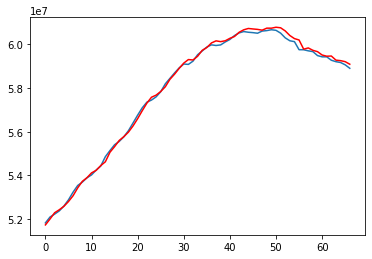

In [6]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
# load dataset
def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
se_ries = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Global%2C%20only%20Date%20and%20Infected%2C%20CSV%20formatted.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
se_ries.head()
month_index = se_ries.index.to_period('M')
# split into train and test sets
X = se_ries.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()